In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing - ML

In [2]:
AbuseTweets = pd.read_csv('abuseTweets.txt', delimiter="\t", header=None,names=['id', 'text','#', 'abuse'])

In [3]:
from sklearn.model_selection import train_test_split
y=AbuseTweets.abuse
sentences=AbuseTweets.text

sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, y, test_size=0.20, random_state=1000)

In [6]:
nltk.download('stopwords') ## do not need it
stop_words = set(stopwords.words("english"))
snow = nltk.stem.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/qiqintian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def fix_Text(text):
	letters_only = re.sub("[^a-zA-Z]"," ", str(text))
	words=letters_only.lower().split()
	meaningful=[snow.stem(word) for word in words if word not in stop_words]
	return(" ".join(meaningful))

In [9]:
num_resp = AbuseTweets["text"].size
clean_text = []

for i in range(0,num_resp):
	clean_text.append(fix_Text(AbuseTweets["text"][i]))
    
clean_text[0:15]    

['know fact alcohol deplet seroquel level blood yet',
 'mg seroquel normal mg lovan mcg clonazepam',
 'seven miss call get seroquel mg lower get ridicul',
 'fella facebook ask swap seroquel yella tramadol hahahahahaha right',
 'take vyvans stuff like year mg month ago switch adderal mg',
 'antipsychot quetiapin sedat olanzapin risperidon aripiprazol lithium augment agent',
 'take quetiapin suppos relax end fall asleep within hour brain alway scatter haha',
 'seroquel pretti heavi stuff would thought would gotten ssri psychotrop',
 'tell kid gave six seroquel two cigarett come lol',
 'look tweet near one refus take seroquel xr anymor bullshit',
 'dead think bedtim fuck quetiapin',
 'may weed seroquel found clean room g',
 'hate hear take seroquel like swallow sleep pill u wake tri function normal',
 'im bout slip seroquel drink gonna knock',
 'prescrib quetiapin obes patient along diet still take quetiapin longer obes amp health good']

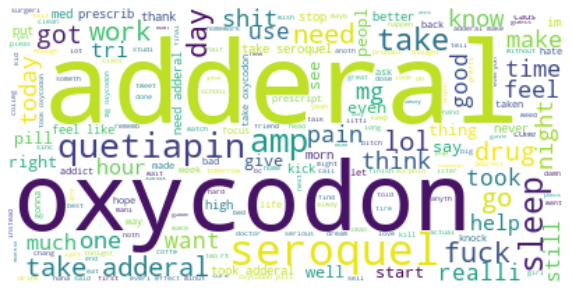

In [10]:
text_wc = " ".join(item for item in clean_text)
wordcloud = WordCloud(background_color="white").generate(text_wc)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() 

In [17]:
new_stopwords = ['seroquel','oxycontin','adderal','oxycodon','quetiapine']
new_stopwords_list = stop_words.union(new_stopwords)

In [18]:
def fix_Text(text):
	letters_only = re.sub("[^a-zA-Z]"," ", str(text))
	words=letters_only.lower().split()
	meaningful=[snow.stem(word) for word in words if word not in new_stopwords_list]
	return(" ".join(meaningful))

In [23]:
num_resp = AbuseTweets["text"].size
clean_text2 = []

for i in range(0,num_resp):
	clean_text2.append(fix_Text(AbuseTweets["text"][i]))
    
clean_text2[0:15]    

['know fact alcohol deplet level blood yet',
 'mg normal mg lovan mcg clonazepam',
 'seven miss call get mg lower get ridicul',
 'fella facebook ask swap yella tramadol hahahahahaha right',
 'take vyvans stuff like year mg month ago switch adderal mg',
 'antipsychot sedat olanzapin risperidon aripiprazol lithium augment agent',
 'take suppos relax end fall asleep within hour brain alway scatter haha',
 'pretti heavi stuff would thought would gotten ssri psychotrop',
 'tell kid gave six two cigarett come lol',
 'look tweet near one refus take xr anymor bullshit',
 'dead think bedtim fuck',
 'may weed found clean room g',
 'hate hear take like swallow sleep pill u wake tri function normal',
 'im bout slip drink gonna knock',
 'prescrib obes patient along diet still take longer obes amp health good']

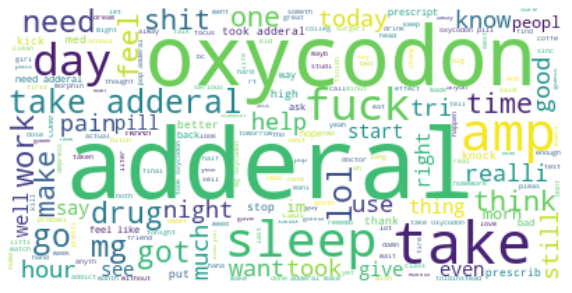

In [24]:
text_wc = " ".join(item for item in clean_text2)
wordcloud = WordCloud(background_color="white").generate(text_wc)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() 

In [25]:
tfVectorizer=TfidfVectorizer()
tfdtm= tfVectorizer.fit_transform(clean_text)
tfidfVec=TfidfVectorizer(min_df=6) 
x = tfidfVec.fit_transform(clean_text)

In [26]:
df = pd.DataFrame(x.toarray(), columns=tfidfVec.get_feature_names())
df.head()

,abilifi,abl,abus,accident,acetaminophen,act,actual,ad,add,adderal,...,yeah,year,yep,yes,yesterday,yet,yo,yrs,zombi,zopiclon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.3727,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102877,...,0.0,0.280128,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0


In [42]:
X_train=df[df.index.isin(sentences_train.index)]
y_train=AbuseTweets.abuse[df.index.isin(sentences_train.index)]
X_test=df[~df.index.isin(sentences_train.index)]
y_test=AbuseTweets.abuse[~df.index.isin(sentences_train.index)]

# Machine Learning Modeling

In [115]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV

### feature selection

In [53]:
ChiS = SelectKBest(chi2, k=300)
X_new=ChiS.fit_transform(X_train, y_train)

In [65]:
columns=df.columns[ChiS.get_support()].tolist()

### BBC_Naive Bayes

In [257]:
mnb = MultinomialNB()
bbc_mnb = BalancedBaggingClassifier(base_estimator=mnb,replacement=True)

In [258]:
params_bbc_mnb={'max_features':[50,100,150],
                'n_estimators':[100,200,300]}

In [262]:
grid_bbc_mnb=GridSearchCV(estimator=bbc_mnb,
                          param_grid=params_bbc_mnb,
                          scoring='roc_auc',
                          cv=3,n_jobs=-1).fit(X_new,y_train)

In [267]:
print(grid_bbc_mnb.best_params_)

{'max_features': 100, 'n_estimators': 200}


In [265]:
y_pred = grid_bbc_mnb.best_estimator_.predict(X_test[columns])
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       523
           1       0.22      0.55      0.32        80

    accuracy                           0.68       603
   macro avg       0.57      0.63      0.55       603
weighted avg       0.82      0.68      0.73       603



### BBC_Random Forest 

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [196]:
rf=RandomForestClassifier()
bbc_dt=BalancedBaggingClassifier(base_estimator=rf)

In [201]:
# Define the dictionary 'params_rf'
params_rf = {'base_estimator__n_estimators':[30,50],
             'base_estimator__max_features':['log2','sqrt'],
             'base_estimator__min_samples_leaf':[20,10],
             'base_estimator__max_depth':[3,4],
             'n_estimators':[100,200,300]}

In [202]:
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=bbc_dt,
                       param_grid=params_rf,
                       scoring='roc_auc',  
                       cv=3,
                       verbose=0,
                       n_jobs=-1).fit(X_new,y_train)

In [204]:
print(grid_rf.best_params_)

{'base_estimator__max_depth': 3, 'base_estimator__max_features': 'log2', 'base_estimator__min_samples_leaf': 10, 'base_estimator__n_estimators': 50, 'n_estimators': 300}


In [206]:
y_pred = grid_rf.best_estimator_.predict(X_test[columns])
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.67      0.78       523
           1       0.22      0.59      0.32        80

    accuracy                           0.66       603
   macro avg       0.56      0.63      0.55       603
weighted avg       0.82      0.66      0.71       603



### BBC_Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [158]:
params = {'base_estimator__learning_rate': [0.01,0.05,0.1],
          'base_estimator__max_depth': [3,4],
          'base_estimator__max_features':['log2','sqrt'],
          'n_estimators':[100,200,300]}

In [162]:
# SGD
sgb = GradientBoostingClassifier(n_estimators=100,min_samples_split=20,subsample=0.8)
sgb_bbc = BalancedBaggingClassifier(base_estimator=sgb)

In [163]:
grid_bbc_sgd = GridSearchCV(estimator=sgb_bbc,
                       param_grid=params, 
                       cv = 3,
                       scoring='roc_auc',
                       n_jobs=-1).fit(X_new,y_train)

In [268]:
print(grid_bbc_sgd.best_params_)

{'base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 4, 'base_estimator__max_features': 'log2', 'n_estimators': 300}


In [166]:
y_pred = grid_bbc_sgd.best_estimator_.predict(X_test[columns])
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       523
           1       0.24      0.51      0.33        80

    accuracy                           0.72       603
   macro avg       0.58      0.63      0.58       603
weighted avg       0.82      0.72      0.76       603



### BBC_Ada Boosting

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [252]:
mnb = MultinomialNB()
dt=DecisionTreeClassifier(max_depth=1)
ada=AdaBoostClassifier()
bbc_ada = BalancedBaggingClassifier(base_estimator=ada,replacement=True,
                                 max_features=300) # adaboosting shoul use all features
params={'base_estimator__n_estimators':[200,300],
        'base_estimator__learning_rate':[0.05,0.1],
        'base_estimator__base_estimator':[dt,mnb]}

In [254]:
grid_ada= GridSearchCV(estimator=bbc_ada,
                       param_grid=params, 
                       cv = 3,
                       scoring='roc_auc',
                       n_jobs=-1).fit(X_new,y_train)

In [271]:
print(grid_ada.best_params_)

{'base_estimator__base_estimator': DecisionTreeClassifier(max_depth=1), 'base_estimator__learning_rate': 0.1, 'base_estimator__n_estimators': 300}


In [270]:
y_pred = grid_ada.best_estimator_.predict(X_test[columns])
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       523
           1       0.26      0.51      0.34        80

    accuracy                           0.74       603
   macro avg       0.58      0.64      0.59       603
weighted avg       0.82      0.74      0.77       603



# Evaluate ML Model

In [274]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

In [275]:
# Define the list classifiers
classifiers=  [('bbc_mnb', grid_bbc_mnb.best_estimator_), 
               ('bbc_rf', grid_rf.best_estimator_), 
               ('bbc_sgd', grid_bbc_sgd.best_estimator_),
               ('bbc_ada',grid_ada.best_estimator_)]

In [277]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_new, y_train)    
   
    # Predict y_pred
    y_pred_proba = clf.predict_proba(X_test[columns])[:,1]
    
    # Calculate roc_auc
    roc_auc = roc_auc_score(y_test,y_pred_proba) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, roc_auc))

bbc_mnb : 0.687
bbc_rf : 0.643
bbc_sgd : 0.710
bbc_ada : 0.696


## Deep Learning

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, GRU, LSTM, GlobalAveragePooling1D,GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import backend as K
from sklearn.metrics import classification_report
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [368]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [369]:
vocab_size

5311

In [370]:
tokenizer.word_index # words
tokenizer.word_counts #a dictionary of words and their counts
tokenizer.word_docs #a dictionary of the total number of documents that were used to fit the tokenizer
tokenizer.document_count #a dictionary of words and how many documents each appears in

2410

In [371]:
num_tokens = [len(tokens) for tokens in X_train + X_test]
num_tokens = np.array(num_tokens)
#The maximum number of tokens we will allow is set to the average plus 2 standard deviations
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

26

In [372]:
num_tokens.max()

32

In [373]:
# pad sequences
from keras.preprocessing.sequence import pad_sequences
maxlen = 26
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

[   1   85   20 2227 2228   37    2   12    7 2229 1517    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


## Preload 

In [295]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [339]:
filepath= "/Users/qiqintian/Desktop/Data/Project/glove/glove.6B.200d.txt"

In [341]:
embedding_dim = 200 # dim  
embedding_matrix = create_embedding_matrix(filepath,tokenizer.word_index,embedding_dim)
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))

# Deep Learning Model

In [300]:
from keras.optimizers import Adam,SGD,RMSprop
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.metrics import AUC

In [301]:
(y_test==1).sum()/len(y_test)

0.13266998341625208

In [320]:
len(y_test)/(y_test==1).sum()

7.5375

### Model 1

In [342]:
# create the RNN
opt = RMSprop(lr =0.01)

model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=200,weights=[embedding_matrix],
                    input_length=26,trainable=False,name='embedding'))
model.add(LSTM(50, dropout=0.15, recurrent_dropout=0.1,return_sequences=False))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=opt) #?
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 26, 200)           1062200   
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                50200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 1,112,451
Trainable params: 50,251
Non-trainable params: 1,062,200
_________________________________________________________________


In [343]:
# Early stop on validation accuracy
early_stop_monitor = EarlyStopping(patience = 3,monitor='val_loss',restore_best_weights=True)
# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_model.hdf5', save_best_only = True)

In [346]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test),
                  callbacks=[early_stop_monitor,modelCheckpoint],verbose=False,batch_size=32,
                 class_weight= {1: 0.87, 0: 0.13})

In [306]:
plt.style.use('ggplot')
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

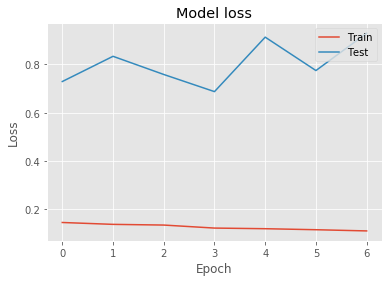

In [347]:
plot_loss(history.history['loss'],history.history['val_loss'])

In [348]:
from sklearn.metrics import classification_report
preds = model.predict_classes(X_test)
print(classification_report(y_test, preds, digits=6))

              precision    recall  f1-score   support

           0   0.852941  0.665392  0.747583       523
           1   0.102564  0.250000  0.145455        80

    accuracy                       0.610282       603
   macro avg   0.477753  0.457696  0.446519       603
weighted avg   0.753389  0.610282  0.667699       603



### Model 2

In [374]:
opt=Adam(lr=0.01)
model2=Sequential()
model2.add(Embedding(input_dim=vocab_size,output_dim=200,weights=[embedding_matrix],
                    input_length=26,trainable=False,name='embedding'))
model2.add(LSTM(15,dropout=0.15,recurrent_dropout=0.1,return_sequences=True))
model2.add(LSTM(15,dropout=0.15,recurrent_dropout=0.1,return_sequences=False))
model2.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model2.compile(loss='binary_crossentropy', optimizer=opt)
model2.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 26, 200)           1062200   
_________________________________________________________________
lstm_18 (LSTM)               (None, 26, 15)            12960     
_________________________________________________________________
lstm_19 (LSTM)               (None, 15)                1860      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 16        
Total params: 1,077,036
Trainable params: 14,836
Non-trainable params: 1,062,200
_________________________________________________________________


In [375]:
history=model2.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test),
                  callbacks=[early_stop_monitor,modelCheckpoint],verbose=False,batch_size=32,
                 class_weight= {1: 0.87, 0:0.13})

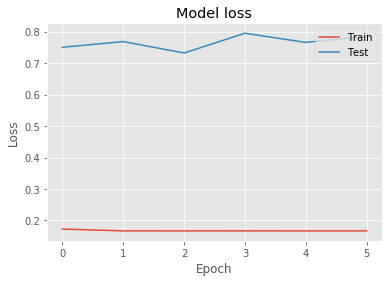

In [376]:
plot_loss(history.history['loss'],history.history['val_loss'])

In [377]:
preds = model2.predict_classes(X_test)
print(classification_report(y_test, preds, digits=6))

              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       523
           1   0.132670  1.000000  0.234261        80

    accuracy                       0.132670       603
   macro avg   0.066335  0.500000  0.117130       603
weighted avg   0.017601  0.132670  0.031079       603



/Users/qiqintian/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### model 3

In [378]:
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [383]:
# create the RNN
opt = RMSprop(lr =0.01)

model3=Sequential()
model3.add(Embedding(input_dim=vocab_size,output_dim=200,weights=[embedding_matrix],
                    input_length=26,trainable=False,name='embedding'))
model3.add(Conv1D(filters=100, kernel_size=2, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2,strides=2))
model3.add(LSTM(50, dropout=0.15, recurrent_dropout=0.1,return_sequences=False))
model3.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)))

model3.compile(loss='binary_crossentropy', optimizer=opt) 

In [384]:
history=model3.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test),
                   callbacks=[early_stop_monitor,modelCheckpoint],
                   verbose=False,batch_size=32,
                   class_weight= {1: 0.87, 0: 0.13})

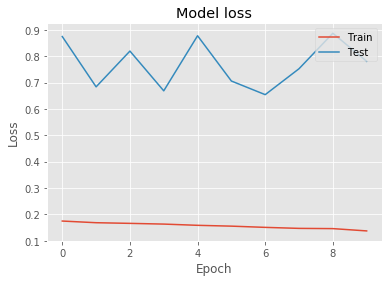

In [385]:
plot_loss(history.history['loss'],history.history['val_loss'])

In [386]:
preds = model3.predict_classes(X_test)
print(classification_report(y_test, preds, digits=6))

              precision    recall  f1-score   support

           0   0.867925  0.703633  0.777191       523
           1   0.134078  0.300000  0.185328        80

    accuracy                       0.650083       603
   macro avg   0.501001  0.501816  0.481260       603
weighted avg   0.770565  0.650083  0.698669       603



### Parameter Tuning

In [387]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [388]:
# Creates a model given an activation and learning rate
def create_model(learning_rate,activation,optimizer):   
    # Create your binary classification model  
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,output_dim=200,weights=[embedding_matrix],
                    input_length=26,trainable=False,name='embedding'))
    model.add(Conv1D(filters=15, kernel_size=2, padding='same', activation=activation,kernel_initializer='glorot_uniform'))
    model.add(MaxPooling1D(pool_size=2,strides=2))
    model.add(LSTM(15, dropout=0.15, recurrent_dropout=0.1,return_sequences=False))
    model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(learning_rate)))
    # Compile your model with your optimizer, loss, and metrics
    model.compile(loss ='binary_crossentropy', metrics = ['accuracy'],optimizer=optimizer)
    return model

In [389]:
# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)
# Define the parameters to try out
params = {'batch_size': [32, 64], 'learning_rate':[0.01,0.001],'activation':['tanh','relu'],
          'optimizer': ['sgd','adam','rmsprop']}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = 3)

In [390]:
# Running 
random_search.fit(X_train,y_train,
                  class_weight= {1: 0.87, 0: 0.13},
                  epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[early_stop_monitor,modelCheckpoint])

Train on 1606 samples, validate on 603 samples
Epoch 1/100
1606/1606 [==============================] - 2s 954us/step - loss: 0.1669 - accuracy: 0.4240 - val_loss: 0.7069 - val_accuracy: 0.3035
Epoch 2/100
1606/1606 [==============================] - 1s 483us/step - loss: 0.1670 - accuracy: 0.3207 - val_loss: 0.7116 - val_accuracy: 0.2289
Epoch 3/100
1606/1606 [==============================] - 1s 492us/step - loss: 0.1669 - accuracy: 0.2933 - val_loss: 0.7166 - val_accuracy: 0.1857
Epoch 4/100
804/804 [==============================] - 0s 143us/step
Train on 1607 samples, validate on 603 samples
Epoch 1/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1774 - accuracy: 0.3914 - val_loss: 0.7114 - val_accuracy: 0.2388
Epoch 2/100
1607/1607 [==============================] - 1s 491us/step - loss: 0.1764 - accuracy: 0.2769 - val_loss: 0.7299 - val_accuracy: 0.1758
Epoch 3/100
1607/1607 [==============================] - 1s 518us/step - loss: 0.1758 - accuracy: 0.2116

1606/1606 [==============================] - 1s 464us/step - loss: 0.1353 - accuracy: 0.6943 - val_loss: 0.5218 - val_accuracy: 0.7944
Epoch 16/100
1606/1606 [==============================] - 1s 467us/step - loss: 0.1381 - accuracy: 0.7123 - val_loss: 0.7978 - val_accuracy: 0.4942
Epoch 17/100
1606/1606 [==============================] - 1s 532us/step - loss: 0.1293 - accuracy: 0.7291 - val_loss: 0.5899 - val_accuracy: 0.7065
Epoch 18/100
1606/1606 [==============================] - 1s 473us/step - loss: 0.1232 - accuracy: 0.7597 - val_loss: 0.4780 - val_accuracy: 0.8176
Epoch 19/100
1606/1606 [==============================] - 1s 468us/step - loss: 0.1207 - accuracy: 0.7902 - val_loss: 0.6447 - val_accuracy: 0.6451
Epoch 20/100
1606/1606 [==============================] - 1s 465us/step - loss: 0.1140 - accuracy: 0.7895 - val_loss: 0.5424 - val_accuracy: 0.7529
Epoch 21/100
804/804 [==============================] - 0s 118us/step
Train on 1607 samples, validate on 603 samples
Epoch 1/

1607/1607 [==============================] - 1s 779us/step - loss: 0.1659 - accuracy: 0.2570 - val_loss: 0.7132 - val_accuracy: 0.1758
Epoch 2/100
1607/1607 [==============================] - 0s 275us/step - loss: 0.1645 - accuracy: 0.1693 - val_loss: 0.7038 - val_accuracy: 0.2206
Epoch 3/100
1607/1607 [==============================] - 0s 276us/step - loss: 0.1644 - accuracy: 0.2184 - val_loss: 0.7196 - val_accuracy: 0.1476
Epoch 4/100
1607/1607 [==============================] - 0s 266us/step - loss: 0.1638 - accuracy: 0.2209 - val_loss: 0.7467 - val_accuracy: 0.1343
Epoch 5/100
803/803 [==============================] - 0s 87us/step
Train on 1606 samples, validate on 603 samples
Epoch 1/100
1606/1606 [==============================] - 2s 1ms/step - loss: 0.1659 - accuracy: 0.1949 - val_loss: 0.7233 - val_accuracy: 0.1343
Epoch 2/100
1606/1606 [==============================] - 0s 303us/step - loss: 0.1660 - accuracy: 0.1806 - val_loss: 0.7246 - val_accuracy: 0.1343
Epoch 3/100
1606/

1607/1607 [==============================] - 1s 369us/step - loss: 0.1897 - accuracy: 0.1661 - val_loss: 0.8149 - val_accuracy: 0.1327
Epoch 3/100
1607/1607 [==============================] - 1s 385us/step - loss: 0.1867 - accuracy: 0.1661 - val_loss: 0.8246 - val_accuracy: 0.1327
Epoch 4/100
803/803 [==============================] - 0s 95us/step
Train on 1607 samples, validate on 603 samples
Epoch 1/100
1607/1607 [==============================] - 2s 980us/step - loss: 0.1865 - accuracy: 0.2701 - val_loss: 0.7606 - val_accuracy: 0.1327
Epoch 2/100
1607/1607 [==============================] - 1s 367us/step - loss: 0.1828 - accuracy: 0.2209 - val_loss: 0.7443 - val_accuracy: 0.1376
Epoch 3/100
1607/1607 [==============================] - 1s 454us/step - loss: 0.1804 - accuracy: 0.1487 - val_loss: 0.7498 - val_accuracy: 0.1343
Epoch 4/100
1607/1607 [==============================] - 1s 407us/step - loss: 0.1774 - accuracy: 0.1991 - val_loss: 0.7341 - val_accuracy: 0.1824
Epoch 5/100
160

1606/1606 [==============================] - 0s 278us/step - loss: 0.1562 - accuracy: 0.5616 - val_loss: 0.8023 - val_accuracy: 0.2720
Epoch 11/100
1606/1606 [==============================] - 0s 267us/step - loss: 0.1565 - accuracy: 0.4714 - val_loss: 0.8669 - val_accuracy: 0.2056
Epoch 12/100
804/804 [==============================] - 0s 83us/step
Train on 1607 samples, validate on 603 samples
Epoch 1/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1752 - accuracy: 0.2520 - val_loss: 0.8107 - val_accuracy: 0.1327
Epoch 2/100
1607/1607 [==============================] - 1s 542us/step - loss: 0.1741 - accuracy: 0.1661 - val_loss: 0.7950 - val_accuracy: 0.1327
Epoch 3/100
1607/1607 [==============================] - 1s 457us/step - loss: 0.1736 - accuracy: 0.1661 - val_loss: 0.7996 - val_accuracy: 0.1327
Epoch 4/100
1607/1607 [==============================] - 1s 363us/step - loss: 0.1725 - accuracy: 0.1668 - val_loss: 0.8108 - val_accuracy: 0.1327
Epoch 5/100
803

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x15a899810>,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'batch_size': [32, 64],
                                        'learning_rate': [0.01, 0.001],
                                        'optimizer': ['sgd', 'adam',
                                                      'rmsprop']})

In [391]:
print('Best: {} using:{}'.format(random_search.best_score_,random_search.best_params_))

Best: 0.6103005011876425 using:{'optimizer': 'rmsprop', 'learning_rate': 0.001, 'batch_size': 32, 'activation': 'tanh'}


In [392]:
preds = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, preds, digits=6))

              precision    recall  f1-score   support

           0   0.868293  0.340344  0.489011       523
           1   0.133166  0.662500  0.221757        80

    accuracy                       0.383085       603
   macro avg   0.500729  0.501422  0.355384       603
weighted avg   0.770763  0.383085  0.453554       603

